In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
# 导入lasso模块
from sklearn.linear_model import Lasso
# 导入 train_test_split 模块
from sklearn.model_selection import train_test_split


In [4]:
# 加载数据，设置浮点型数值
# data_features = np.load('data_EC_20181107-20190228.npy')
# data_targets = np.load('data_2d_yundingtotalobs_qiwen_2018110708-20190228.npy')
# data_features = data_features.astype(float)
# data_targets = data_targets.astype(float)
# data_targets = np.around(data_targets, decimals=2)
# data_features.shape  # （34,248,13）
# data_features = data_features.reshape((34, 3224))
# data_targets = data_targets.reshape((3224,))
# data_all = np.append(data_features, [data_targets], axis=0)  # 34 * 3224
# print(np.array(data_all).shape)
# data_all = data_all.transpose()  # 转置3244*35
# np.savetxt("./targets.csv", data_all, delimiter=",", fmt="%f")

(35, 3224)


In [5]:
# # 数据清洗
# data_csv = pd.read_csv("./targets.csv", header=None)
# # 去除特征值全为0的行 和 去除目标值为0的行
# data_csv = data_csv.loc[~(data_csv.loc[:, 0:33] == 0).all(axis=1) & ~(data_csv.loc[:, 34] == 0), :]
# np.savetxt("./targets1.csv", data_csv, delimiter=",", fmt="%f")

In [6]:
# # 将数据分为训练集与测试集
# data_csv = pd.read_csv("./targets1.csv", header=None)
# features = data_csv.loc[0:1950, 0:33]
# trargets = data_csv.loc[0:1950, 34]
# X_train, X_test, y_train, y_test = train_test_split(features, trargets)  # 默认样本比例是0.75，0.25


In [3]:
data = pd.read_csv('dropzero_20181107-20190228.csv')
examDf = DataFrame(data)
new_examDf = examDf.iloc[:, 0:]
# 检验数据
print(new_examDf.describe())  # 数据描述，会显示最值，平均数等信息，可以简单判断数据中是否有异常值
print(new_examDf[new_examDf.isnull() == True].count())  # 检验缺失值，若输出为0，说明该列没有缺失值


        Unnamed: 0            0            1            2            3  \
count  1944.000000  1944.000000  1944.000000  1944.000000  1944.000000   
mean   1182.023148    11.020679     2.772428     2.774126    -1.777335   
std     707.232817     5.474447     1.391507     1.393051     1.974237   
min      78.000000     0.000000    -1.380000    -1.400000    -7.380000   
25%     563.750000     7.480000     1.740000     1.700000    -3.150000   
50%    1153.500000    11.125000     2.730000     2.700000    -1.685000   
75%    1640.250000    15.062500     3.712500     3.700000    -0.377500   
max    2647.000000    23.630000     7.590000     7.600000     3.510000   

                 4            5            6          7            8  ...  \
count  1944.000000  1944.000000  1944.000000  1944.0000  1944.000000  ...   
mean    -22.816646   -10.368771     0.408904   -10.4241  1029.150340  ...   
std       7.687848     6.593393     1.596817     6.8620     8.290248  ...   
min     -41.750000   -28.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(new_examDf.iloc[:, :34], new_examDf.iloc[:,34],
                                                    train_size=0.75,random_state=0)

In [5]:
#第一步定义模型
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, 
                                   scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]  


0.1342642193077822

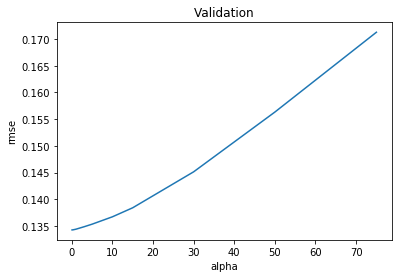

In [6]:
### 第二步 通过RMSE挑选最佳alpha
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")
cv_ridge.min()


In [7]:
#第三步 通过lasso模型挑选最佳alpha
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)   
rmse_cv(model_lasso).mean()   



D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.331657045997428, tolerance: 0.17354759605488848
  tol, rng, random, positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.924569164913079, tolerance: 0.17354759605488848
  tol, rng, random, positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.876168617471102, tolerance: 0.16871137650085766
  tol, rng, random, positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteration

0.13610785077166504

In [8]:
##第四步 查看lasso回归变量系数
coef = pd.Series(model_lasso.coef_, index = X_train.columns)   
  
print("Lasso picked " + str(sum(coef != 0)) + 
      " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")    


Lasso picked 31 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

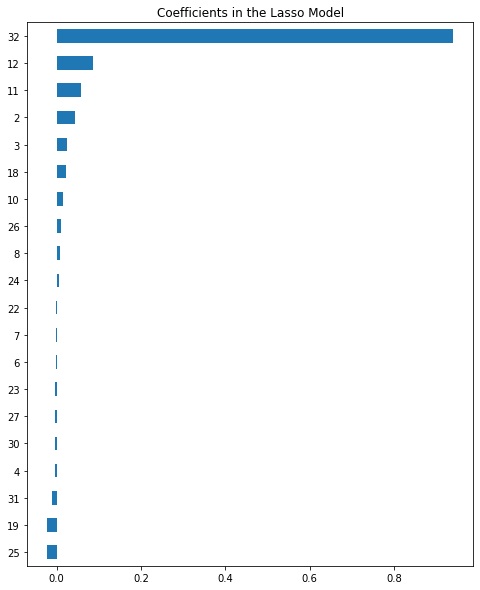

In [9]:
#第五步 查看最重要的变量和最不重要的变量
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


准确率: 0.9896104846124579


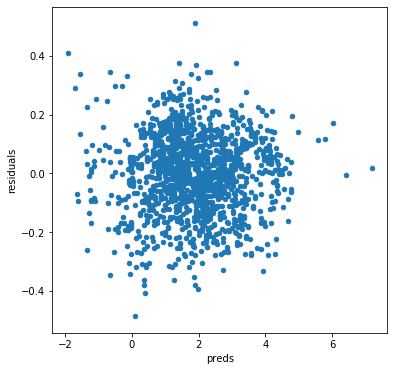

In [10]:
#第六步 查看预测值和真实值之差


#let's look at the residuals as well:
plt.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(X_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")
score = model_lasso.score(X_test,y_test)
print('准确率:',score)